In [1]:
import time

import functions as fs

import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import pandas_ta as pta
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
ticker = "^GSPC"
start_date = "2013-01-01"
end_date = "2023-01-01"

day_data = fs.yahoodata(ticker=ticker,
                        period1=start_date,
                        period2=end_date,
                        interval="1d").getdata()
week_data = fs.yahoodata(ticker=ticker,
                        period1=start_date,
                        period2=end_date,
                        interval="1wk").getdata()
month_data = fs.yahoodata(ticker=ticker,
                        period1=start_date,
                        period2=end_date,
                        interval="1mo").getdata()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
data_base = {"Daily": day_data["Close"], "Weekly": week_data["Close"], "Monthly": month_data["Close"]}
data_base


{'Daily': Date
 2013-01-02    1462.420044
 2013-01-03    1459.369995
 2013-01-04    1466.469971
 2013-01-07    1461.890015
 2013-01-08    1457.150024
                  ...     
 2022-12-23    3844.820068
 2022-12-27    3829.250000
 2022-12-28    3783.219971
 2022-12-29    3849.280029
 2022-12-30    3839.500000
 Name: Close, Length: 2518, dtype: float64,
 'Weekly': Date
 2013-01-01    1461.890015
 2013-01-08    1470.680054
 2013-01-15    1485.979980
 2013-01-22    1500.180054
 2013-01-29    1495.709961
                  ...     
 2022-11-29    3998.840088
 2022-12-06    3990.560059
 2022-12-13    3817.659912
 2022-12-20    3844.820068
 2022-12-27    3839.500000
 Name: Close, Length: 522, dtype: float64,
 'Monthly': Date
 2013-01-01    1498.109985
 2013-02-01    1514.680054
 2013-03-01    1569.189941
 2013-04-01    1597.569946
 2013-05-01    1630.739990
                  ...     
 2022-08-01    3955.000000
 2022-09-01    3585.620117
 2022-10-01    3871.979980
 2022-11-01    4080.110107
 

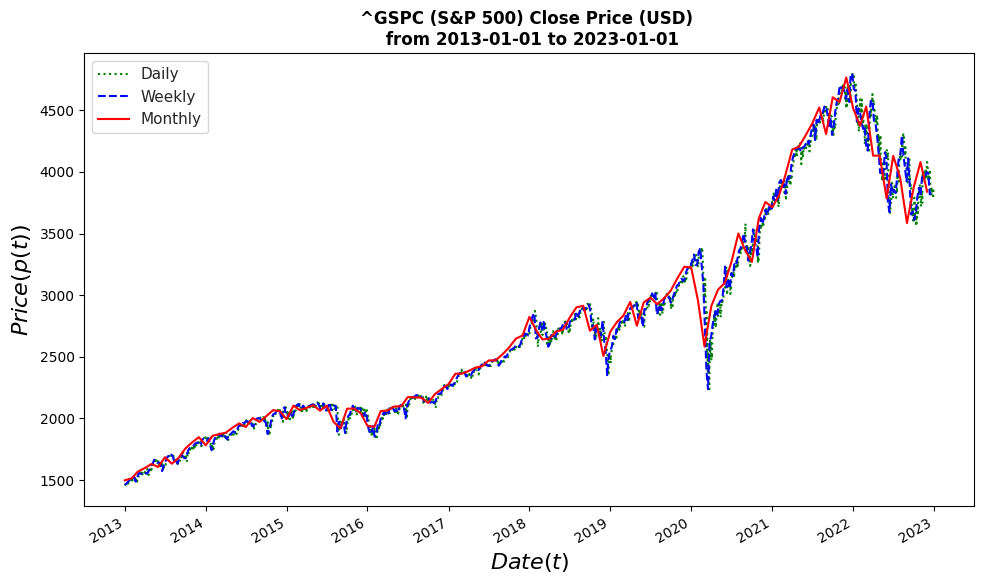

In [4]:
for (interval, price), linestyle, color in zip(data_base.items(), [":", "--", "-"], ["green", "blue", "red"]):
    price.plot(y="Close", label=interval, color=color, figsize=(10,6), linestyle=linestyle)
plt.xlabel(xlabel="$Date (t)$", fontweight="bold", style="italic", fontsize = 16)
plt.ylabel(ylabel="$Price (p(t))$", fontweight="bold", style="italic", fontsize = 16)
plt.title(f"{ticker} (S&P 500) Close Price (USD) \n from {start_date} to {end_date}", fontweight="bold")
sns.set(style="whitegrid")
plt.legend()
plt.tight_layout()
plt.show();

In [5]:
returns = []
for intervals, prices in data_base.items():
    returns.append(fs.log_returns(prices))
returns = dict(zip(data_base.keys(), returns))
returns

{'Daily': Date
 2013-01-02         NaN
 2013-01-03   -0.002088
 2013-01-04    0.004853
 2013-01-07   -0.003128
 2013-01-08   -0.003248
                 ...   
 2022-12-23    0.005851
 2022-12-27   -0.004058
 2022-12-28   -0.012093
 2022-12-29    0.017311
 2022-12-30   -0.002544
 Name: Close, Length: 2518, dtype: float64,
 'Weekly': Date
 2013-01-01         NaN
 2013-01-08    0.005995
 2013-01-15    0.010350
 2013-01-22    0.009511
 2013-01-29   -0.002984
                 ...   
 2022-11-29    0.008766
 2022-12-06   -0.002073
 2022-12-13   -0.044294
 2022-12-20    0.007089
 2022-12-27   -0.001385
 Name: Close, Length: 522, dtype: float64,
 'Monthly': Date
 2013-01-01         NaN
 2013-02-01    0.011000
 2013-03-01    0.035355
 2013-04-01    0.017924
 2013-05-01    0.020550
                 ...   
 2022-08-01   -0.043367
 2022-09-01   -0.098049
 2022-10-01    0.076835
 2022-11-01    0.052358
 2022-12-01   -0.060782
 Name: Close, Length: 120, dtype: float64}

<Figure size 640x480 with 0 Axes>

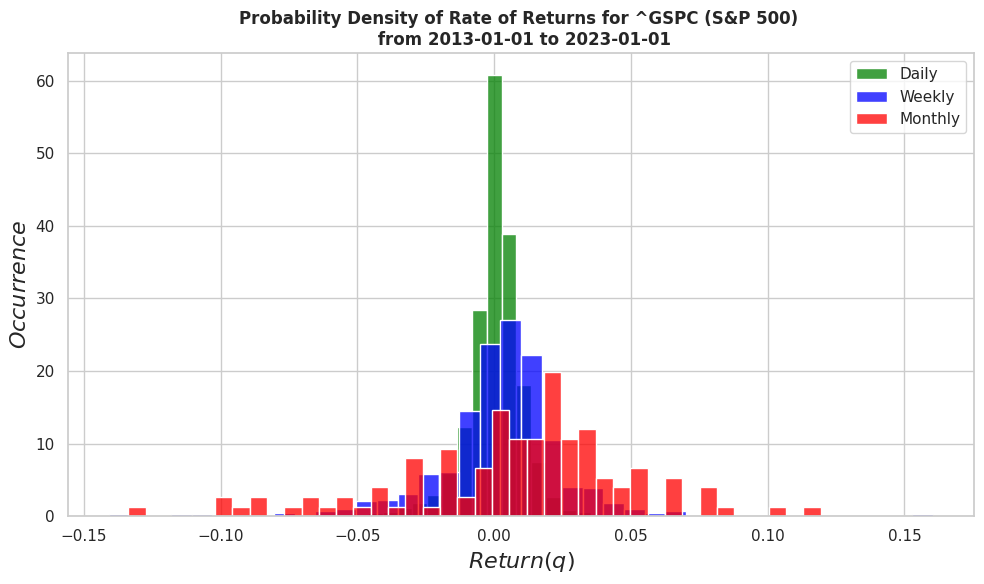

In [22]:
plt.cla()
plt.clf()
fig = plt.figure(figsize = (10,6))


for (interval, Return), linestyle, color in zip(data_base.items(), [":", "--", "-"], ["green", "blue", "red"]):
    sns.histplot(returns[interval], stat="density", label=interval, color=color, bins=40, edgecolor='white')
    

plt.xlabel(xlabel="$Return(q)$", fontweight="bold", style="italic", fontsize = 16)
plt.ylabel(ylabel="$Occurrence$", fontweight="bold", style="italic", fontsize = 16)
plt.title(f"Probability Density of Rate of Returns for {ticker} (S&P 500) \n from {start_date} to {end_date}", fontweight="bold")
sns.set(style="whitegrid")
plt.legend()
plt.tight_layout()
plt.show();

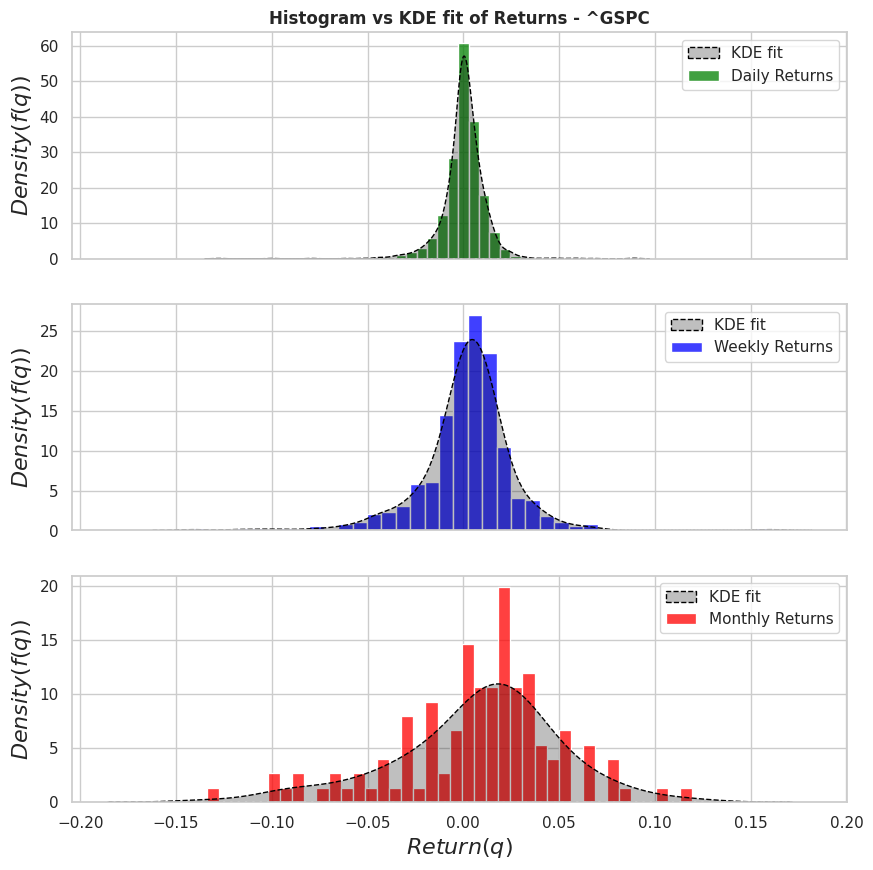

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)
grid_size = 1000
axes[0].set_title("Histogram vs KDE fit of Returns - {}".format(ticker), fontweight="bold")
for (interval, Return), linestyle, color, ax in zip(data_base.items(), [":", "--", "-"], ["green", "blue", "red"], axes):
    sns.histplot(returns[interval], ax=ax, stat="density", label=interval + ' Returns', color=color, bins=40, edgecolor='white')
    sns.kdeplot(returns[interval], ax=ax, color="black", common_norm=True, bw_method="silverman", gridsize=grid_size, linestyle="--", linewidth=1, label="KDE fit", fill=True)
    ax.set_ylabel(ylabel="$Density(f(q))$", fontweight="bold", style="italic", fontsize = 16)
    ax.legend()

ax.set_xlabel(xlabel="$Return(q)$", fontweight="bold", style="italic", fontsize = 16)
sns.set(style="whitegrid")
plt.show()

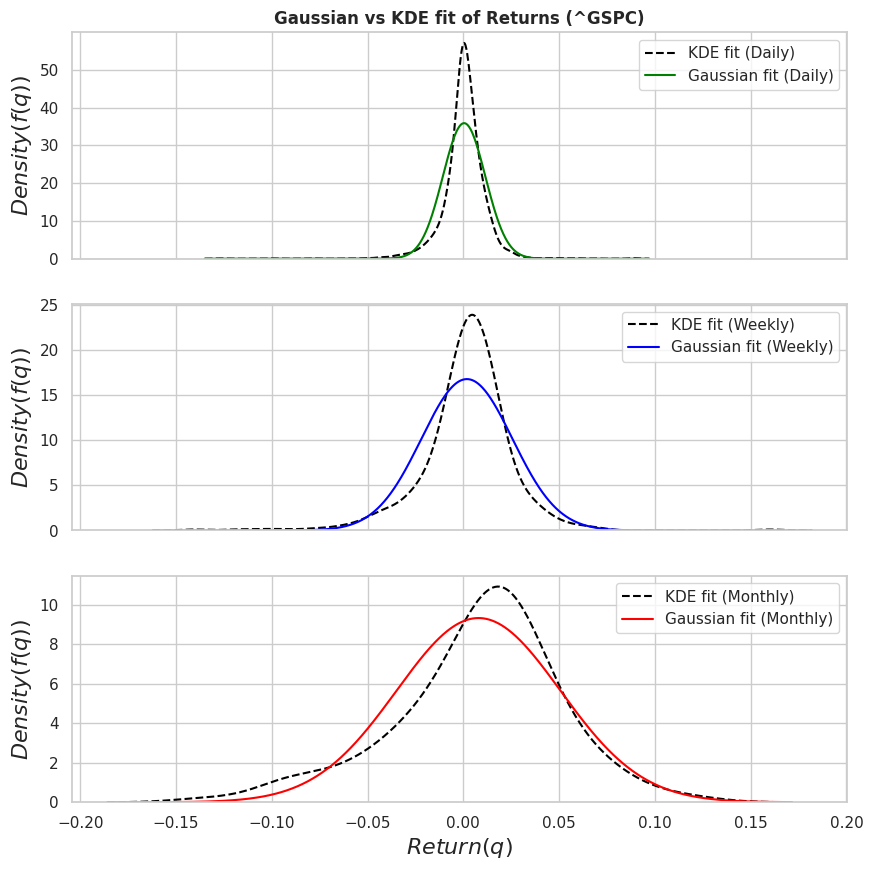

In [20]:
PDF = []
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)
grid_size = 1000
axes[0].set_title("Gaussian vs KDE fit of Returns ({})".format(ticker), fontweight="bold")
for (interval, Return), color, ax in zip(data_base.items(), ["green", "blue", "red"], axes):
    PDF = fs.density_function(returns[interval], size=grid_size,
                              common_norm=False, color='black',
                              clf=False, ax=ax, linestyle='--',
                              label=f'KDE fit ({interval})')
    GDF = fs.gaussian_fit(returns=returns[interval], reph_returns=PDF["Rephurbished Returns"])
    sns.lineplot(x=PDF["Rephurbished Returns"], y=GDF, ax=ax, color=color, label=f'Gaussian fit ({interval})', linestyle='-')
    ax.set_ylabel(ylabel="$Density(f(q))$", fontweight="bold", style="italic", fontsize = 16)
    ax.legend()

ax.set_xlabel(xlabel="$Return(q)$", fontweight="bold", style="italic", fontsize = 16)
sns.set(style="whitegrid")
plt.show();